<I><h1>The Final Exam of Artificial Neural Network</h1></I>

<I><h3>Name & Surname: Ata Shaker</h3></I>
<I><h3>Student No.: 040200925</h3></I>

<I>Importing necessary libraries.</I>

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import warnings, itertools
warnings.simplefilter('ignore')

<I>At first, we read the data. Then we drop <B>Maximum_Speed_Of_Wind</B> column because it mostly comprises of <B>NaN</B> values.</I>
<I>There are significant inconsistency in the columns <B>Average_Pressure_Sea_Level</B> and <B>Average_Pressure_Station_Level</B> before September of the year 1993. That's why, I thaught it would be better to work on the data after the mentioned date, which unfortunately cuts down the number of days on the record roughly by half.</I>

In [137]:
df = pd.read_csv('Madrid_Weather_1991_1995.csv') # Reading Data
df = df.drop(axis = 1,  columns= ['Unnamed: 0', 'Maximum_Speed_Of_Wind'])# Dropping Columns
df = df.replace({'-': np.NaN}) # Replacing '-' with NaN's
df = df.apply(lambda x: pd.to_numeric(x, errors='ignore'), axis = 0) # converting non_numeric values to numeric values 
df = df.iloc[912:, :].reset_index(drop=True) # Droping half of the data
month_and_day_df = df[['Month', 'Day']]
df

,Year,Month,Day,Average_Temperature,Maximum_Temperature,Minimum_Temperature,Average_Pressure_Sea_Level,Average_Pressure_Station_Level,Average_Relative_Humidity,Total_Rainfall_Snowmelt,Average_Visibility,Average_Wind_Speed,Maximum_Sustained_Wind_Speed,Indicator_For_Occurrence_Of_Fog,Indicator_For_Occurrence_Of_Rain,Indicator_For_Occurrence_Of_Snow,Indicator_For_Occurrence_Of_Hail,Indicator_For_Occurrence_Of_Thunder,Indicator_For_Occurrence_Of_Tornado_Funnel_Cloud
0,1993,7,1,19.9,25.0,14.8,1016.9,949.5,59.0,0.00,11.1,17.4,27.8,0,0,0,0,0,0
1,1993,7,2,19.8,26.0,13.0,1017.9,951.7,52.0,0.00,12.4,15.9,25.9,0,0,0,0,0,0
2,1993,7,3,20.6,27.5,14.0,1017.3,952.1,54.0,0.00,15.8,15.2,22.2,0,1,0,0,1,0
3,1993,7,4,22.1,27.5,10.0,1016.1,950.8,59.0,0.00,15.6,10.2,33.5,0,0,0,0,0,0
4,1993,7,5,24.3,31.8,16.6,1015.4,951.5,50.0,0.00,13.0,7.0,18.3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,1995,12,27,9.7,11.0,6.5,1008.8,941.1,87.0,6.10,10.1,11.7,22.2,0,1,0,0,0,0
910,1995,12,28,11.3,14.0,8.0,1012.8,945.0,78.0,0.00,12.4,14.6,22.2,0,1,0,0,0,0
911,1995,12,29,9.0,10.2,7.6,1011.6,943.1,95.0,7.87,6.9,8.5,16.5,0,1,0,0,0,0
912,1995,12,30,11.5,14.0,8.8,1001.6,935.1,91.0,21.08,10.3,17.8,29.4,0,1,0,0,0,0


<I>We had to drop even more columns because their extremely low or high correlation with the label. Features that their correlation was less than 0.1 or greater 0.9. However, <B>Month</B> and <B>Day</B> were the only exceptions, since they were required by the definition problem.</I>

In [138]:
absed_corr = np.abs(df.corr()['Average_Temperature']) # Calculating correlation
columns_to_be_kept_df = pd.DataFrame((absed_corr <= 0.9) & (absed_corr >= 0.1)).reset_index() # Filtering some features
columns_to_be_kept_list = list(columns_to_be_kept_df[columns_to_be_kept_df['Average_Temperature'] == True]['index'])
df_processed = df[columns_to_be_kept_list]

# Creating columns for the more general dataframe
number_list = [str(x) for x in range(1, 4)] 
overall_columns = [x[0] + '_'+ x[1] for x in list(itertools.product(columns_to_be_kept_list, number_list))]
temp = []
for i in range(3):
    temp += [overall_columns[x] for x in range(len(overall_columns)) if x % 3 == i]
overall_columns = temp
overall_columns

['Average_Pressure_Sea_Level_1',
 'Average_Pressure_Station_Level_1',
 'Average_Relative_Humidity_1',
 'Average_Visibility_1',
 'Maximum_Sustained_Wind_Speed_1',
 'Indicator_For_Occurrence_Of_Fog_1',
 'Indicator_For_Occurrence_Of_Rain_1',
 'Indicator_For_Occurrence_Of_Thunder_1',
 'Average_Pressure_Sea_Level_2',
 'Average_Pressure_Station_Level_2',
 'Average_Relative_Humidity_2',
 'Average_Visibility_2',
 'Maximum_Sustained_Wind_Speed_2',
 'Indicator_For_Occurrence_Of_Fog_2',
 'Indicator_For_Occurrence_Of_Rain_2',
 'Indicator_For_Occurrence_Of_Thunder_2',
 'Average_Pressure_Sea_Level_3',
 'Average_Pressure_Station_Level_3',
 'Average_Relative_Humidity_3',
 'Average_Visibility_3',
 'Maximum_Sustained_Wind_Speed_3',
 'Indicator_For_Occurrence_Of_Fog_3',
 'Indicator_For_Occurrence_Of_Rain_3',
 'Indicator_For_Occurrence_Of_Thunder_3']

<I>After narrowing down the features into only 8, there were still many <B>NaN</B>-valued cells which hadto be filled with the mean of the non-null cells before and after <B>NaN</B>-valued cells.</I>

In [139]:
for column in df_processed.columns:
    nan_index_list = list(df_processed[column].index[(df_processed[column].isna())])
    for index in nan_index_list:
        temp = 1
        to_be_assigned_list = [index]
        while True: # Checking whether next element are also NaN or not
            if (index + temp) in nan_index_list:
                to_be_assigned_list.append(index + temp)
                temp += 1
            else:
                for redundant_index in to_be_assigned_list[1:]:
                    nan_index_list.remove(redundant_index) # Removing NaN from the list
                # Assigning the mean to the null_valued cells
                df_processed.loc[to_be_assigned_list, column] = np.mean([df_processed.loc[index - 1, column], df_processed.loc[index + temp , column]])
                break

<I>Then, as it is required by the problem, we needed to filter the whole data into 4 sub-groups in which 3 consequtive days are organized accordingly.</I>

In [140]:
sub_X_train_1 = df_processed.iloc[[x for x in df.index if x % 4 in [0,1,2]]].reset_index(drop=True) # Days 1, 2, 3, etc.
sub_X_train_2 = df_processed.iloc[[x for x in df.index if x % 4 in [1,2,3]]].reset_index(drop=True) # Days 2, 3, 4, etc.
sub_X_train_3 = df_processed.iloc[[x for x in df.index if x % 4 in [2,3,0]]].reset_index(drop=True) # Days 3, 4, 5, etc.
sub_X_train_4 = df_processed.iloc[[x for x in df.index if x % 4 in [3,0,1]]].reset_index(drop=True) # Days 4, 5, 6, etc.

<I>Below, we have a function which reorders the dataframes defined above. Every 3 days in the dataframes above get reordered into a single row inside a new dataframe.</I>

In [141]:
def df_breaker(df_temp):
    df_res = pd.DataFrame(np.zeros((1,24))) # Creating an empty dataframe with 24 columns
    counter = 0
    for index in df_temp.index:
        counter += 1
        if index % 3 == 0:
            df_res.iloc[index//3,0:8] = df_temp.iloc[index,:]
        elif index % 3 == 1:
            df_res.iloc[index//3,8:16] = df_temp.iloc[index,:]
        elif index % 3 == 2:
            df_res.iloc[index//3,16:24] = df_temp.iloc[index,:]

        if counter % 3 == 0:
            df_res = df_res.append(pd.DataFrame(np.zeros((1,24)))).reset_index(drop=True) # Adding a new row to the data
            counter = counter % 3

    return df_res

sub_X_train_1_new = df_breaker(sub_X_train_1)
sub_X_train_2_new = df_breaker(sub_X_train_2)
sub_X_train_3_new = df_breaker(sub_X_train_3)
sub_X_train_4_new = df_breaker(sub_X_train_4)

<I>Below, we collect all reordered dataframes into a single dataframe called <B>X_train</B> and add <B>Month</B> and <B>Day</B> columns to it. We also reorganized the <B>y_train</B> according to <B>X_train</B>.</I>

In [142]:
# Creating a comprehensive dataframe
X_train = pd.concat([sub_X_train_1_new, sub_X_train_2_new, sub_X_train_3_new, sub_X_train_4_new], axis=0, join="outer", ignore_index=True)
X_train = pd.concat ([month_and_day_df, X_train], axis=1, join='outer')
X_train = X_train.dropna()
X_train.columns = ['Month', 'Day'] + overall_columns
# Reordering y_train to match X_train 
temperature = df['Average_Temperature']
temp = []
for i in [3,0,1,2]:
    temp += [temperature[x] for x in range(len(temperature)) if x % 4 == i]
y_train = pd.DataFrame(temp)
X_train

,Month,Day,Average_Pressure_Sea_Level_1,Average_Pressure_Station_Level_1,Average_Relative_Humidity_1,Average_Visibility_1,Maximum_Sustained_Wind_Speed_1,Indicator_For_Occurrence_Of_Fog_1,Indicator_For_Occurrence_Of_Rain_1,Indicator_For_Occurrence_Of_Thunder_1,...,Indicator_For_Occurrence_Of_Rain_2,Indicator_For_Occurrence_Of_Thunder_2,Average_Pressure_Sea_Level_3,Average_Pressure_Station_Level_3,Average_Relative_Humidity_3,Average_Visibility_3,Maximum_Sustained_Wind_Speed_3,Indicator_For_Occurrence_Of_Fog_3,Indicator_For_Occurrence_Of_Rain_3,Indicator_For_Occurrence_Of_Thunder_3
0,7.0,1.0,1016.9,949.5,59.0,11.1,27.8,0.0,0.0,0.0,...,0.0,0.0,1017.3,952.1,54.0,15.8,22.2,0.0,1.0,1.0
1,7.0,2.0,1015.4,951.5,50.0,13.0,18.3,0.0,0.0,0.0,...,0.0,0.0,1017.9,952.3,35.0,11.7,27.8,0.0,0.0,0.0
2,7.0,3.0,1009.7,945.6,40.0,12.1,29.4,0.0,0.0,0.0,...,0.0,0.0,1018.4,952.4,42.0,15.4,14.8,0.0,0.0,0.0
3,7.0,4.0,1019.5,954.9,41.0,13.4,22.2,0.0,0.0,0.0,...,0.0,0.0,1010.8,947.7,39.0,11.7,18.3,0.0,0.0,0.0
4,7.0,5.0,1014.7,950.8,31.0,13.7,25.9,0.0,0.0,0.0,...,0.0,0.0,1012.7,948.2,41.0,13.0,25.9,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,12.0,27.0,1013.9,943.9,79.0,11.6,9.4,0.0,0.0,0.0,...,1.0,0.0,1018.1,950.1,84.0,10.5,11.1,0.0,0.0,0.0
910,12.0,28.0,1022.2,953.7,72.0,10.8,22.2,0.0,0.0,0.0,...,0.0,0.0,1019.8,949.7,88.0,7.9,7.6,0.0,0.0,0.0
911,12.0,29.0,1013.8,943.8,52.0,12.7,25.9,0.0,0.0,0.0,...,1.0,0.0,1021.2,952.1,85.0,7.2,18.3,1.0,1.0,0.0
912,12.0,30.0,1023.1,955.3,91.0,8.0,9.4,1.0,0.0,0.0,...,1.0,0.0,1020.2,951.6,86.0,6.4,14.8,0.0,0.0,0.0


<I><H4>Training</H4></I>

In [143]:
# Splitting data into test and train
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [144]:
lr = LinearRegression()
lr.fit(X_train_new, y_train_new)
lr_prediction = lr.predict(X_test_new)
errors = abs(lr_prediction-np.array(y_test_new).ravel())
m = 100 * (errors/(np.array(y_test_new).ravel()))
lr_accuracy = 100 - np.mean(m)
print(f'''Linear Regression
Mean Absolute Error: {np.round(mean_absolute_error(y_test_new, lr_prediction), 4)}
Mean Squared Error: {np.round(mean_squared_error(y_test_new, lr_prediction), 4)}
Accuracy: {np.round(lr_accuracy, 4)} %''')

Linear Regression
Mean Absolute Error: 2.3274
Mean Squared Error: 10.8159
Accuracy: 30.7813 %


Text(0.5, 0, 'Days')

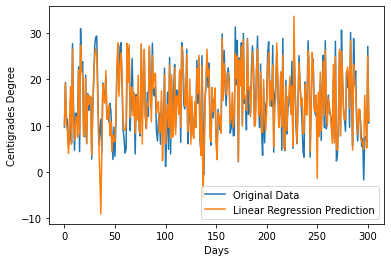

In [145]:
# Not good enough
plt.plot(np.array(y_test_new).ravel())
plt.plot(lr_prediction)
plt.legend(['Original Data', 'Linear Regression Prediction'])
plt.ylabel('Centigrades Degree')
plt.xlabel('Days')

In [146]:
sv = SVR(kernel='rbf', gamma='auto', C = 10)
sv.fit(X_train_new, y_train_new)
sv_prediction = sv.predict(X_test_new)

errors = abs(sv_prediction-np.array(y_test_new).ravel())
m = 100 * (errors/(np.array(y_test_new).ravel()))
sv_accuracy = 100-np.mean(m)

print(f'''SVC
Mean Absolute Error: {np.round(mean_absolute_error(y_test_new, sv_prediction), 4)}
Mean Squared Error: {np.round(mean_squared_error(y_test_new, sv_prediction), 4)}
Accuracy: {np.round(sv_accuracy, 4)} %''')

SVC
Mean Absolute Error: 6.2365
Mean Squared Error: 55.3239
Accuracy: 44.1422 %


Text(0.5, 0, 'Days')

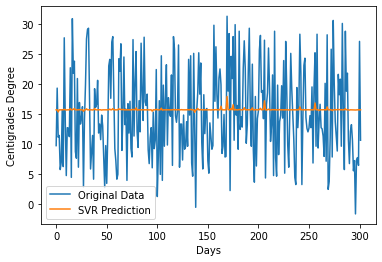

In [147]:
# Worse than linear regression
plt.plot(np.array(y_test_new).ravel())
plt.plot(sv_prediction)
plt.legend(['Original Data', 'SVR Prediction'])
plt.ylabel('Centigrades Degree')
plt.xlabel('Days')

In [148]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train_new, y_train_new)
rfr_prediction = rfr.predict(X_test_new)
errors = abs(rfr_prediction - y_test_new.values.ravel().astype('float'))
m = 100 * (errors/(y_test_new.values.ravel().astype('float')))
rfr_accuracy = 100-np.mean(m)

print(f'''Random Forest Regressor
Mean Absolute Error: {np.round(mean_absolute_error(y_test_new, rfr_prediction), 4)}
Mean Squared Error: {np.round(mean_squared_error(y_test_new, rfr_prediction), 4)}
Accuracy: {np.round(rfr_accuracy, 4)} %''')


Random Forest Regressor
Mean Absolute Error: 2.393
Mean Squared Error: 9.0926
Accuracy: 80.2421 %


Text(0.5, 0, 'Days')

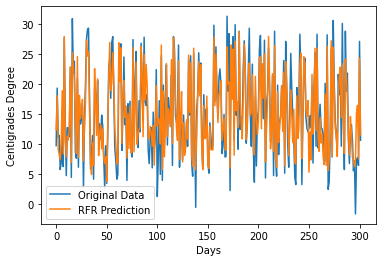

In [149]:
# The Best yet
plt.plot(np.array(y_test_new).ravel())
plt.plot(rfr_prediction)
plt.legend(['Original Data', 'RFR Prediction'])
plt.ylabel('Centigrades Degree')
plt.xlabel('Days')

In [150]:
nn = MLPRegressor()
nn.fit(X_train_new, y_train_new)
nn_prediction = nn.predict(X_test_new)
errors = abs(nn_prediction - y_test_new.values.ravel().astype('float'))
m = 100 * (errors/(y_test_new.values.ravel().astype('float')))
nn_accuracy = 100-np.mean(m)

print(f'''Neural Network
Mean Absolute Error: {np.round(mean_absolute_error(y_test_new, nn_prediction), 4)}
Mean Squared Error: {np.round(mean_squared_error(y_test_new,nn_prediction), 4)}
Accuracy: {np.round(nn_accuracy, 4)} %''')


Neural Network
Mean Absolute Error: 4.4103
Mean Squared Error: 29.1324
Accuracy: 59.4503 %


Text(0.5, 0, 'Days')

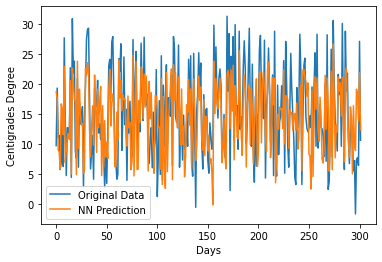

In [151]:
# Worse than RFR but better than Linear Regression and SVR
plt.plot(np.array(y_test_new).ravel())
plt.plot(nn_prediction)
plt.legend(['Original Data', 'NN Prediction'])
plt.ylabel('Centigrades Degree')
plt.xlabel('Days')